In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv('/Users/user/Downloads/AshokaUniversity/monsoon23-courses/IML/final_project/dataset/main_data_merged.csv')
binary_success = pd.read_csv('/Users/user/Downloads/AshokaUniversity/monsoon23-courses/IML/final_project/dataset/binary_success.csv')

In [54]:
data.head(5)

,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre,production_company,production_country,spoken_language,main_cast,main_cast_id,director
0,2115000.0,110669,tt0043116,en,Wabash Avenue,0.109913,2039000.0,92.0,Wabash Avenue,7.0,1.0,1950,3,Music,Twentieth Century Fox Film Corporation,United States of America,English,Betty Grable,64838.0,Henry Koster
1,3768785.0,25209,tt0042200,en,Annie Get Your Gun,2.090588,8000000.0,107.0,Annie Get Your Gun,7.3,22.0,1950,5,Action,Metro-Goldwyn-Mayer (MGM),United States of America,English,Betty Hutton,97182.0,George Sidney
2,1400000.0,705,tt0042192,en,All About Eve,12.063080,63463.0,138.0,All About Eve,8.0,367.0,1950,11,Drama,Twentieth Century Fox Film Corporation,United States of America,English,Bette Davis,3380.0,Joseph L. Mankiewicz
3,2900000.0,11224,tt0042332,en,Cinderella,14.436858,263591415.0,74.0,Cinderella,6.8,1760.0,1950,3,Family,RKO Radio Pictures,United States of America,English,Ilene Woods,68652.0,Clyde Geronimi
4,250000.0,548,tt0042876,ja,羅生門,9.887355,96568.0,88.0,Rashomon,8.0,471.0,1950,12,Crime,Daiei Motion Picture Company,Japan,日本語,Toshirō Mifune,7450.0,Akira Kurosawa


In [55]:
data.dtypes

budget                float64
id                      int64
imdb_id                object
original_language      object
original_title         object
popularity            float64
revenue               float64
runtime               float64
title                  object
vote_average          float64
vote_count            float64
release_year            int64
release_month           int64
genre                  object
production_company     object
production_country     object
spoken_language        object
main_cast              object
main_cast_id          float64
director               object
dtype: object

### We can see a strong correlation between revenue and budget, weak correlation between the release year and runtime,  and a very weak (close to none) correlation between revenue and release_month. The last one makes sense since the relationship between revenue and release month is not linear and specific months like June and December as shown in the bar plot below, tend to have higher revenues than the other months.

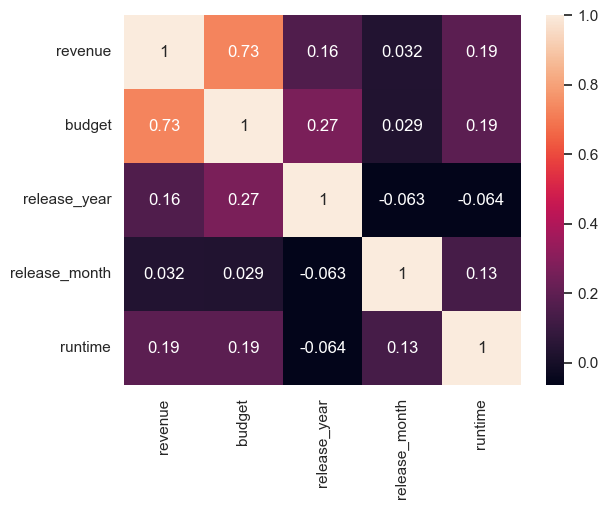

In [56]:
X = data.filter(['revenue', 'budget', 'release_year', 'release_month', 'runtime'], axis=1) # numeric columns
sns.heatmap(X.corr(), annot=True)
plt.show()

### For various categorical features, I plot some charts to see that some particular categories (particular actors, particular directors) star in movies that tend to make more money

In [57]:
actor_total_revenue = data.groupby('main_cast')['revenue'].sum().sort_values(ascending=False)
director_total_revenue = data.groupby('director')['revenue'].sum().sort_values(ascending=False)
production_company_total_revenue = data.groupby('production_company')['revenue'].sum().sort_values(ascending=False)
genre_total_revenue = data.groupby('genre')['revenue'].sum().sort_values(ascending=False)
month_total_revenue = data.groupby('release_month')['revenue'].sum().sort_values(ascending=False)


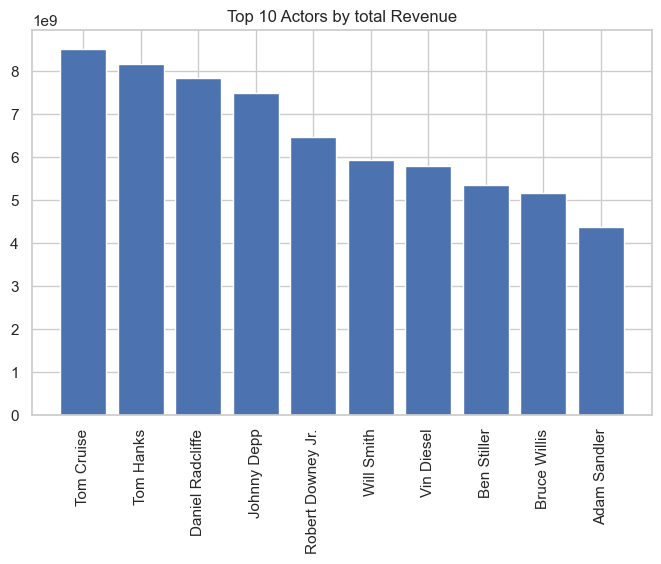

In [58]:
plt.figure(figsize=(8,5))
plt.title("Top 10 Actors by total Revenue")
plt.bar(x=actor_total_revenue.index[:10], height=actor_total_revenue.values[:10])
plt.xticks(rotation=90)
plt.show()

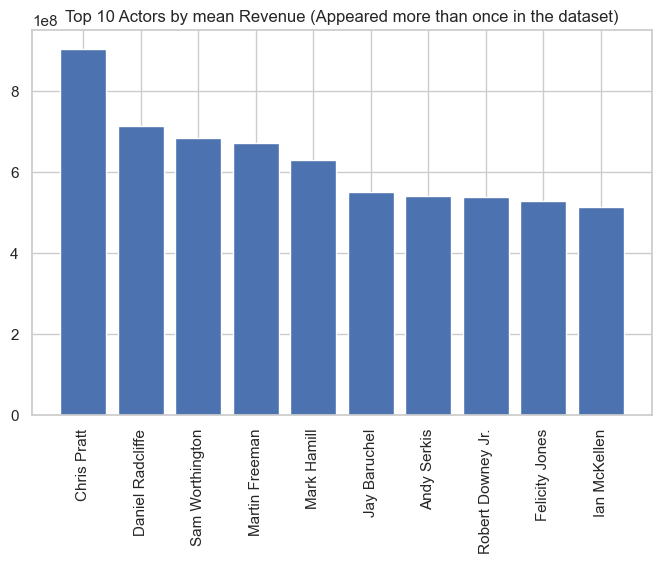

In [59]:
actor_appearances = data['main_cast'].value_counts()
filtered_actors = actor_appearances[actor_appearances > 1].index
actor_mean_revenue = data[data['main_cast'].isin(filtered_actors)].groupby('main_cast')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Top 10 Actors by mean Revenue (Appeared more than once in the dataset)") # leaving out those that appeared only once for a more accurate representation
plt.bar(x=actor_mean_revenue.index[:10], height=actor_mean_revenue.values[:10])
plt.xticks(rotation=90)
plt.show()


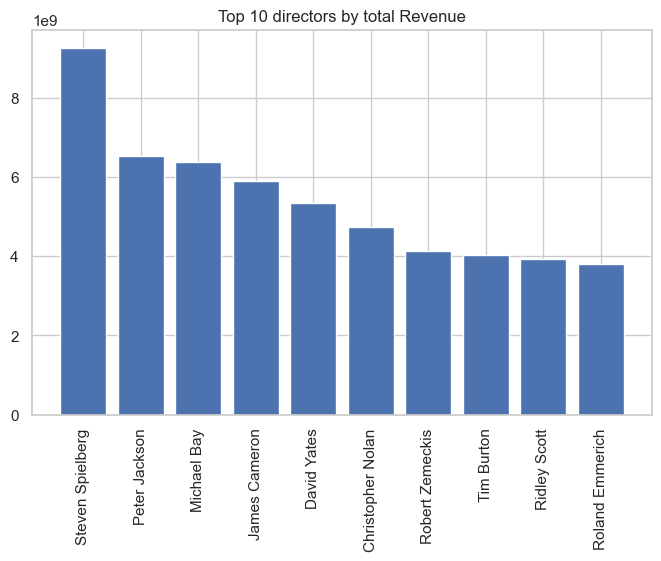

In [60]:
plt.figure(figsize=(8,5))
plt.title("Top 10 directors by total Revenue")
plt.bar(x=director_total_revenue.index[:10], height=director_total_revenue.values[:10])
plt.xticks(rotation=90)
plt.show()

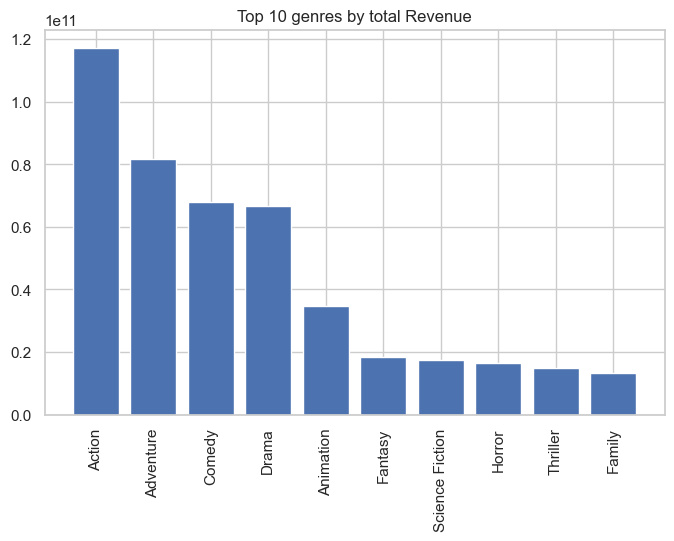

In [61]:
plt.figure(figsize=(8,5))
plt.title("Top 10 genres by total Revenue")
plt.bar(x=genre_total_revenue.index[:10], height=genre_total_revenue.values[:10])
plt.xticks(rotation=90)
plt.show()

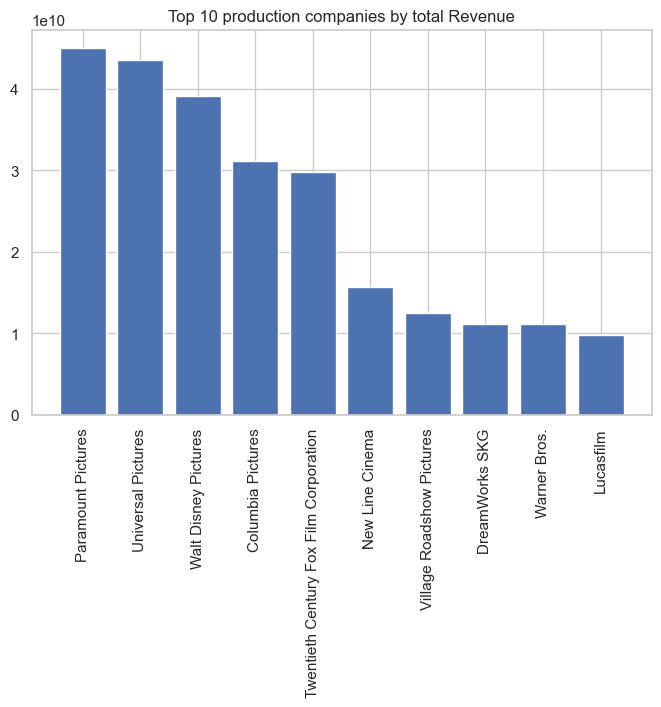

In [62]:
plt.figure(figsize=(8,5))
plt.title("Top 10 production companies by total Revenue")
plt.bar(x=production_company_total_revenue.index[:10], height=production_company_total_revenue.values[:10])
plt.xticks(rotation=90)
plt.show()

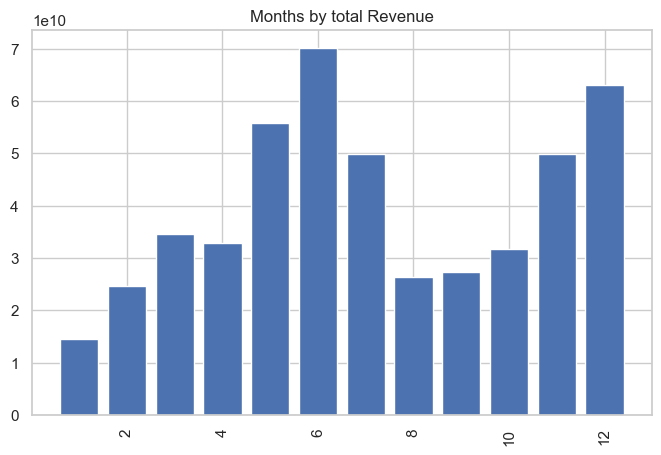

In [63]:
plt.figure(figsize=(8,5))
plt.title("Months by total Revenue")
plt.bar(x=month_total_revenue.index, height=month_total_revenue.values)
plt.xticks(rotation=90)
plt.show()

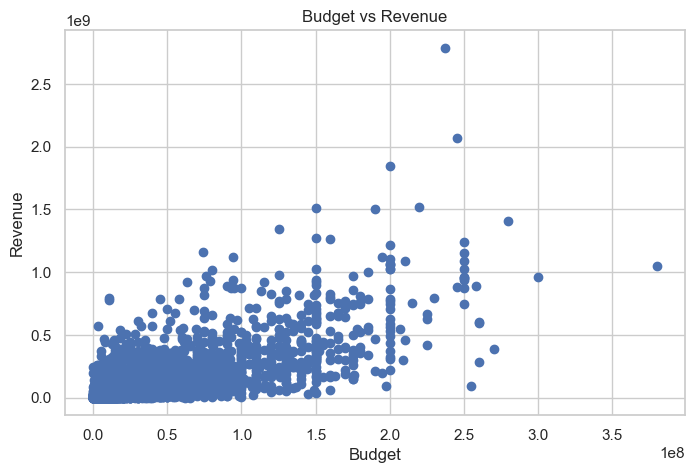

In [64]:
plt.figure(figsize=(8,5))
plt.title("Budget vs Revenue")
plt.scatter(x=data['budget'], y=data['revenue'])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [65]:
data['revenue_over_budget'] = data['revenue'] / data['budget']
data.sort_values(by='revenue_over_budget', ascending=False).head(1)


,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,vote_average,...,release_year,release_month,genre,production_company,production_country,spoken_language,main_cast,main_cast_id,director,revenue_over_budget
2900,15000.0,23827,tt1179904,en,Paranormal Activity,12.706424,193355800.0,86.0,Paranormal Activity,5.9,...,2007,9,Horror,Blumhouse Productions,United States of America,English,Katie Featherston,90596.0,Oren Peli,12890.386667


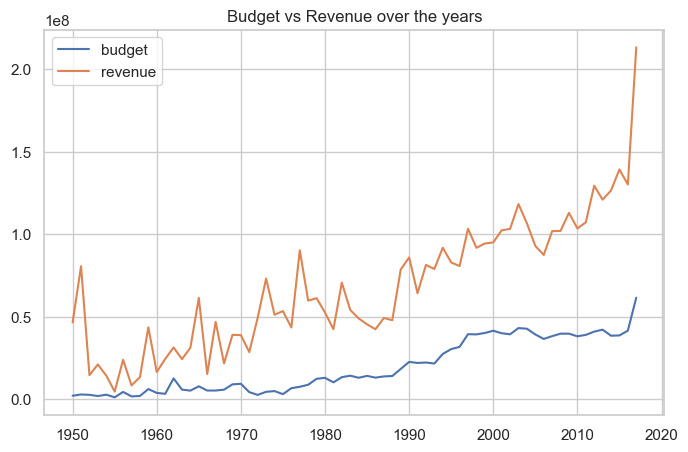

In [66]:
plt.figure(figsize=(8,5))
plt.title("Budget vs Revenue over the years")
plt.plot(data.groupby('release_year')['budget'].mean(), label='budget')
plt.plot(data.groupby('release_year')['revenue'].mean(), label='revenue')
plt.legend()
plt.show()

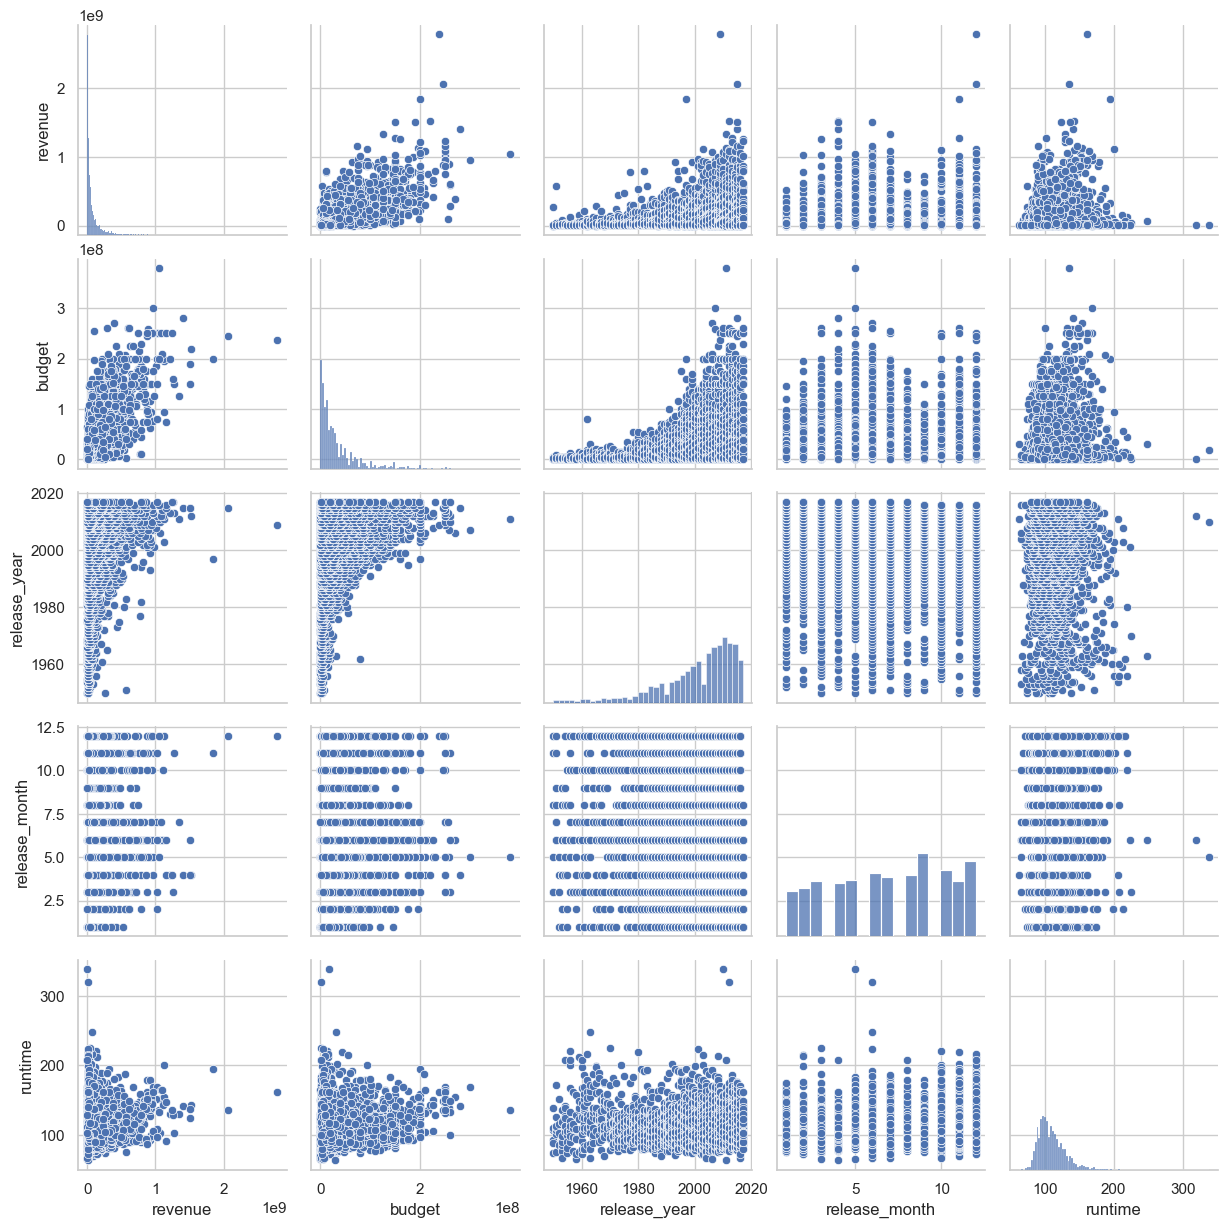

In [67]:
# maybe delete this
sns.set(style='whitegrid', context='notebook')
ax = sns.pairplot(X)
plt.show()

### Binary Success Dataset

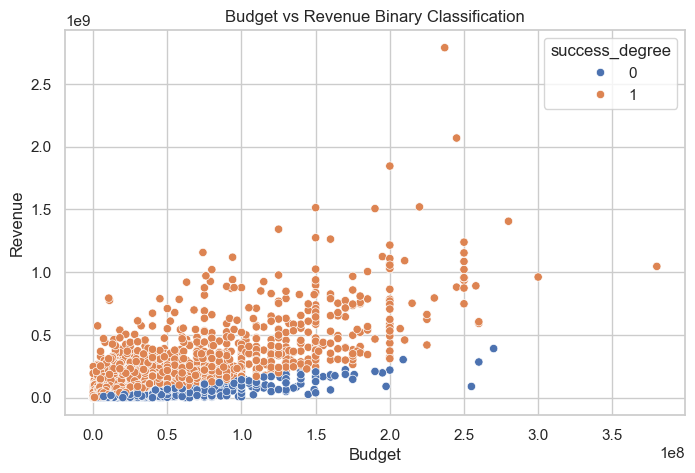

In [68]:
plt.figure(figsize=(8,5))
plt.title("Budget vs Revenue Binary Classification")
sns.scatterplot(x=data['budget'], y=data['revenue'], hue=binary_success['success_degree'])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [69]:
mybins = [0, 90, 120, 180, 220, 350]
mybins = [x - 1 for x in mybins]
bin_counts = pd.cut(binary_success['runtime'], bins=mybins).value_counts()
print(bin_counts)

runtime
(89, 119]     3083
(119, 179]    1271
(-1, 89]       544
(179, 219]      46
(219, 349]       6
Name: count, dtype: int64


In [70]:
bin_success_degree = binary_success.groupby(pd.cut(binary_success['runtime'], bins=mybins))['success_degree'].sum()
bin_success_degree = bin_success_degree / bin_counts
print(bin_success_degree)

runtime
(-1, 89]      0.602941
(89, 119]     0.573792
(119, 179]    0.675846
(179, 219]    0.695652
(219, 349]    0.833333
dtype: float64


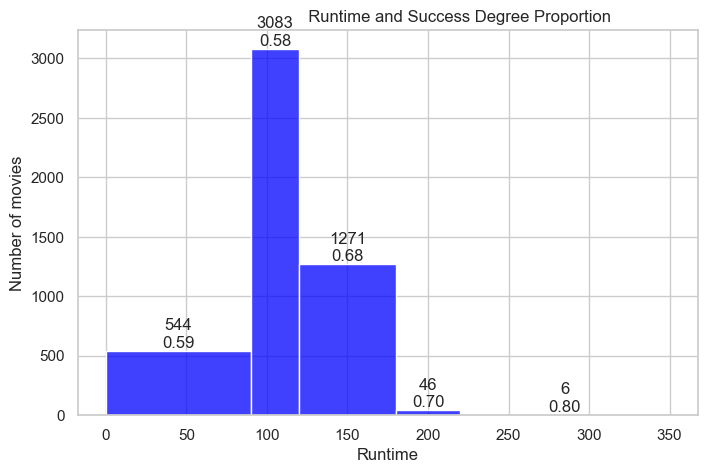

In [71]:
mybins = [0, 90, 120, 180, 220, 350]
plt.figure(figsize=(8,5))
plt.title("                               Runtime and Success Degree Proportion")
sns.histplot(binary_success['runtime'], bins=mybins, kde=False, color='blue') 

bin_ratios = binary_success.groupby(pd.cut(binary_success['runtime'], bins=mybins))['success_degree'].mean()
for p, ratio in zip(plt.gca().patches, bin_ratios):
    plt.gca().annotate(f"{int(p.get_height())}\n{ratio:.2f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel("Runtime")
plt.ylabel("Number of movies")
plt.show()

In [72]:
print("Number of unique production_companies: ", len(data['production_company'].unique()))
print("Number of unique production_countries: ", len(data['production_country'].unique()))
print("Number of unique main_cast: ", len(data['main_cast'].unique()))
print("Number of unique director: ", len(data['director'].unique()))
print("Number of unique original_language: ", len(data['original_language'].unique()))
print("Number of unique spoken_language: ", len(data['spoken_language'].unique()))

Number of unique production_companies:  1278
Number of unique production_countries:  36
Number of unique main_cast:  1962
Number of unique director:  2163
Number of unique original_language:  31
Number of unique spoken_language:  49


In [73]:
data['main_cast'].value_counts()

main_cast
Nicolas Cage           39
Bruce Willis           34
Johnny Depp            32
Tom Hanks              31
Denzel Washington      30
                       ..
John Simm               1
Michael C. Williams     1
Emily Bergl             1
Arjun Sarja             1
Max Irons               1
Name: count, Length: 1962, dtype: int64

In [74]:
actor_appearances = data['main_cast'].value_counts()
actor_appearances[actor_appearances == 1].count()
actor_appearances.mean()


2.522935779816514

In [75]:
actor_first_appearance = data.groupby('main_cast')['release_year'].min()
actor_last_appearance = data.groupby('main_cast')['release_year'].max()
# print(actor_first_appearance[:10], actor_last_appearance[:10])
actor_appearance_range = actor_last_appearance - actor_first_appearance
actor_appearance_range.sort_values(ascending=False).head(10)

main_cast
Warren Beatty     49
Clint Eastwood    44
Robert Duvall     43
Marlon Brando     42
Al Pacino         42
Sean Connery      41
Robert Redford    41
Woody Allen       41
Jeff Bridges      40
Robert De Niro    39
Name: release_year, dtype: int64

In [76]:
data['production_company'].value_counts()

production_company
Universal Pictures                        323
Paramount Pictures                        323
Twentieth Century Fox Film Corporation    241
Columbia Pictures                         205
New Line Cinema                           163
                                         ... 
Shree Ashtavinayak Cinevision Ltd           1
Artfire Films                               1
Nippon Herald Films                         1
Insight Film Studios                        1
Pandastorm Pictures                         1
Name: count, Length: 1278, dtype: int64

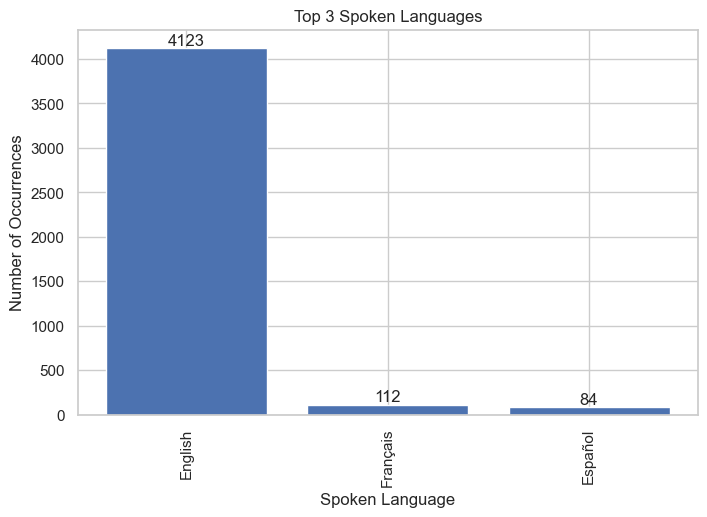

In [77]:
# make a bar chart showing top 5 spoken languages by the number of times they appear in the dataset and label the bars
top_5_spoken_languages = data['spoken_language'].value_counts().head(3)

plt.figure(figsize=(8, 5))
plt.title("Top 3 Spoken Languages")
plt.bar(top_5_spoken_languages.index, top_5_spoken_languages.values)
plt.xlabel("Spoken Language")
plt.ylabel("Number of Occurrences")

# Label the bars
for i, value in enumerate(top_5_spoken_languages.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


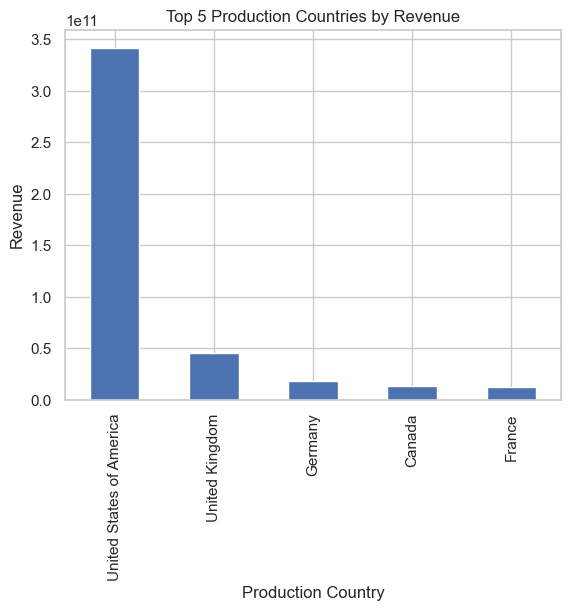

In [78]:
# make a bar chart showing the top 5 production countries by revenue
top_5_production_countries = data.groupby('production_country')['revenue'].sum().sort_values(ascending=False).head(5)
top_5_production_countries.plot(kind='bar')
plt.xlabel('Production Country')
plt.ylabel('Revenue')
plt.title('Top 5 Production Countries by Revenue')
plt.show()
